In [2]:
# Link dos Dados
# https://www.kaggle.com/datasets/michaelhegedusich/soccer-performance-data

# Passo 1: Entendimento do Desafio
# Passo 2: Entendimento da Área/Empresa
# Passo 3: Extração/Obtenção de Dados
# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
# Passo 5: Análise Exploratória
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
# Passo 7: Interpretação de Resultados

# Neste banco de dados há informações como distancia percorrida, tipo sessão(treino/jogo), duração do sono, 
# qualidade do sono, dor após a prática, acelerações e desacelerações.

# O objetivo deste projeto é relacionar estas variáveis com a incidência de lesões nos atletas

In [9]:
#Tratando os dados

import pandas as pd

tabela = pd.read_excel("Workout_Routine_Dirty.xlsx")
tabela = tabela.drop("Injury_Type", axis=1)
tabela.loc[tabela["Position"] == "Goalkeeper", "Position_Number"] = 1
tabela.loc[tabela["Position"] == "Outside Back", "Position_Number"] = 2
tabela.loc[tabela["Position"] == "Central Midfielder", "Position_Number"] = 3
tabela.loc[tabela["Position"] == "Right Wing", "Position_Number"] = 4
tabela.loc[tabela["Position"] == "Left Wing", "Position_Number"] = 5
tabela.loc[tabela["Position"] == "Center Forward", "Position_Number"] = 6

tabela.loc[tabela["Session_Type"] == "Practice", "Session_Number"] = 0
tabela.loc[tabela["Session_Type"] == "Game", "Session_Number"] = 1

tabela['Date'] = pd.to_datetime(tabela['Date'], errors='coerce')

tabela = tabela.dropna(how="all", axis=1)
tabela = tabela.dropna(how="any", axis=0)

display(tabela)
tabela.info()

print(tabela["Injury_Illness"].value_counts())
print(tabela["Injury_Illness"].value_counts(normalize=True).map("{:.1%}".format))

,Date,Name,Position,Position_Number,Session_Type,Session_Number,Sleep_Duration,Sleep_Score,Sleep_Quality,Soreness,Stress,RPE,Distance,Acceleration_Count,Max_Acceleration,Deceleration_Count,Max_Deceleration,Max_Speed,Injury_Illness,Injury_Number
0,2022-10-31,Bill,Outside Back,2.0,Practice,0.0,5.0,78.0,6.0,6.5,8.0,5.0,8054,77,4.53,66,5.90,30.86,No,0
1,2022-10-31,Jack,Right Wing,4.0,Practice,0.0,6.0,82.0,7.0,3.0,7.0,4.0,5422,56,4.99,41,7.90,28.95,No,0
2,2022-10-31,Franco,Center Forward,6.0,Practice,0.0,5.0,78.0,6.0,3.0,8.0,4.0,5131,59,5.72,70,7.52,29.60,No,0
3,2022-10-31,Elijiah,Outside Back,2.0,Practice,0.0,9.0,92.0,8.5,5.5,6.0,6.0,6873,61,4.80,39,6.73,25.72,No,0
5,2022-10-31,Aaron,Left Wing,5.0,Practice,0.0,10.0,96.0,9.0,4.0,5.0,4.0,5396,55,5.79,71,6.94,28.87,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2022-12-20,Micah,Central Midfielder,3.0,Practice,0.0,7.0,84.0,7.5,6.0,6.5,6.0,7640,42,4.77,47,5.83,26.64,No,0
401,2022-12-20,Aaron,Left Wing,5.0,Practice,0.0,6.0,82.0,7.0,4.5,7.0,6.0,6784,43,4.99,69,7.60,24.63,No,0
403,2022-12-20,Trevor,Goalkeeper,1.0,Practice,0.0,8.0,87.0,8.0,3.0,6.0,4.0,5653,62,5.81,36,5.51,24.51,No,0
404,2022-12-20,Jonathon,Outside Back,2.0,Practice,0.0,10.0,96.0,9.0,5.0,4.5,8.0,7603,69,4.75,31,6.60,26.88,No,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 405
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                399 non-null    datetime64[ns]
 1   Name                399 non-null    object        
 2   Position            399 non-null    object        
 3   Position_Number     399 non-null    float64       
 4   Session_Type        399 non-null    object        
 5   Session_Number      399 non-null    float64       
 6   Sleep_Duration      399 non-null    float64       
 7   Sleep_Score         399 non-null    float64       
 8   Sleep_Quality       399 non-null    float64       
 9   Soreness            399 non-null    float64       
 10  Stress              399 non-null    float64       
 11  RPE                 399 non-null    float64       
 12  Distance            399 non-null    int64         
 13  Acceleration_Count  399 non-null    int64         

In [8]:
tabela.describe()

,Position_Number,Session_Number,Sleep_Duration,Sleep_Score,Sleep_Quality,Soreness,Stress,RPE,Distance,Acceleration_Count,Max_Acceleration,Deceleration_Count,Max_Deceleration,Max_Speed,Injury_Number
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,3.408521,0.150376,7.431078,86.245614,7.596491,5.229323,6.194236,5.908521,7181.002506,60.598997,5.728371,52.385965,6.737870,27.819198,0.017544
std,1.686788,0.357888,1.684883,5.928792,1.014388,1.610087,1.174153,1.195586,1484.640669,13.339012,0.816424,15.175238,0.814168,2.005582,0.131451
min,1.000000,0.000000,5.000000,78.000000,4.000000,3.000000,4.000000,4.000000,5108.000000,31.000000,4.500000,28.000000,5.500000,24.500000,0.000000
25%,2.000000,0.000000,6.000000,82.000000,7.000000,4.000000,5.000000,5.000000,6113.500000,50.000000,4.890000,39.000000,5.875000,25.940000,0.000000
50%,3.000000,0.000000,7.000000,84.000000,7.500000,5.500000,6.000000,6.000000,6980.000000,60.000000,5.720000,51.000000,6.750000,27.840000,0.000000
75%,5.000000,0.000000,9.000000,92.000000,8.500000,6.500000,7.000000,6.500000,7789.500000,71.000000,6.630000,65.500000,7.620000,29.605000,0.000000
max,6.000000,1.000000,10.000000,96.000000,9.000000,8.500000,8.500000,8.000000,11995.000000,85.000000,6.990000,80.000000,7.990000,30.970000,1.000000


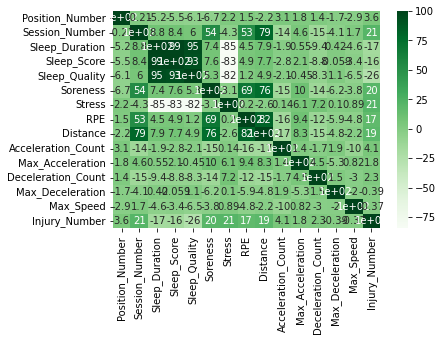

In [7]:
# Análise exploratória 
# Vamos tentar visualizar como as informações de cada item estão distribuídas
# Vamos ver a correlação entre cada um dos itens
# O foco é ver a relação de cada item com o Injury_Number (Lesionou=1, Não Lesionou=0)

import seaborn as sns
import matplotlib.pyplot as plt

tabela.describe()
sns.heatmap(tabela.corr()*100, annot=True, cmap="Greens")
plt.show()

São percebidas relações entre:

- A incidência de lesões teve uma correlação com dor/estresse/taxa de esforço/distância percorrida/tipo de sessão

- O estresse possui uma relação inversamente proporcional com duração do sono/pontuação do sono/qualidade do sono

Portanto é importante o monitoramento destas variáveis tendo em vista a prevenção de lesões, buscando não expor o atleta a jogos em que o mesmo se mostra estressado e com a presença de dor.

E para diminuir o nível de estresse nos atletas, é importante que possuam um sono de qualidade e na duração ideal